<a href="https://colab.research.google.com/github/yuvi-s64/YuviN-DataScience-GenAI-Submissions/blob/main/IB_2AD0_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the goal is to usese EDA to understand the factors associated with Life Expectancy (column 4) in the given dataset and, if time permits, prepare the data for ML modelling. I will check every cell of code after I run it, and source my code from either previous notebooks in my github or gemini after giving it thorough and clear prompts.



In [ ]:
# i import any models i think ill need for EDA or data cleaning and to prepare it for ML modelling as instructed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#I upload the CSV file into my notebook
from google.colab import files
upload = files.upload()

Saving in_class_test(in).csv to in_class_test(in).csv


now that the CSV is uploaded, we use panda to view it as a dataframe (only its head as the dataframe is too large to inspect fully)


In [ ]:
#I applied the code from previous github notebookes
df = pd.read_csv('in_class_test(in).csv')

df.head()

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


### Initial Interpretations from the head of the dataframe

*   **Granularity:** The data appears to be aggregated by `Country`, `Year`, and `Gender` (`Both sexes`, `Female`, `Male`). This suggests we have annual data for different genders within each country.
*   **Target Variable:** `Life Expectancy` is clearly visible and is a numerical column, aligning with our goal of understanding factors associated with it.
*   **Key Health Indicators:** `Infant Mortality Rate` and `Under 5 Mortality Rate` are present, along with their confidence intervals (`Low CI Value`, `High CI Value`), indicating these are statistical estimates and likely important factors.
*   **Dietary Information:** Multiple columns relate to `Cereal Consumption` (e.g., Rye, Barley, Sorghum, Maize, Wheat, Rice) and `Diet Calories` (e.g., Animal Protein, Plant Protein, Fat, Carbohydrates). These could be significant lifestyle or environmental factors.
*   **Missing Values:** `NaN` values are already visible in columns like `Cereal Consumption Rye` and `Cereal Consumption Sorghum` for the initial rows, indicating that missing value handling will be an important step in the EDA process.


In [ ]:
#we will check the amount of columns and rows to get an idea of the size of the df
df.shape

(22050, 150)

there are 22050 rows and 150 columns - a very large dataset, meaning many potential factors influencing Life expectancy.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.2+ MB


using df.info() shows us how many different data types there are as well - mainly floats and integers meaning linear regression may be a viable ML method

next i will check for missing values from the df


In [ ]:
#using panda to show how many missing values are in each column
df.isnull().sum()

,0
Country,0
Year,0
Gender,0
Life Expectancy,0
Infant Mortality Rate,7593
...,...
Cereal Consumption Rice,9084
Diet Calories Animal Protein,9972
Diet Calories Plant Protein,9972
Diet Calories Fat,9972


there are many missing entries in multiple columns - to get a better idea of how that impacts the data lets view it as a percentage

In [ ]:
df.isnull().sum()/len(df) * 100
#code is from notebook 2_05 but applied to our dataset

,0
Country,0.000000
Year,0.000000
Gender,0.000000
Life Expectancy,0.000000
Infant Mortality Rate,34.435374
...,...
Cereal Consumption Rice,41.197279
Diet Calories Animal Protein,45.224490
Diet Calories Plant Protein,45.224490
Diet Calories Fat,45.224490


as we can see, many entries about calories and cerela consumption have high amounts of missing data (40-45%) and infant mortality rate has 34% missing. ideally, we would contact a subject matter expert for instruction on what to do with missing data - whether to remove entries or replace it with mean or median etc. however, in this case we dont have any SMEs on hand so we make the decision ourself.

Based on the high percentage of missing values, especially for the cereal consumption and diet calories columns (40-50%), it's generally best to drop these columns to avoid introducing significant bias or noise through imputation, especially since we already have so many predictor variables for the ML model to use. For 'Infant Mortality Rate' which has 34% missing values, we'll impute with the median, as it's less sensitive to outliers than the mean, and this column is likely very important for life expectancy analysis. Before that, let's identify the columns to drop.

In [ ]:
# Calculate missing percentages first
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Identify columns with 50% or more missing values
missing_threshold = 50
drop_columns = missing_percentages[missing_percentages >= missing_threshold].index.tolist()

print(f"Columns to be dropped due to {missing_threshold}% or more missing values: {drop_columns}")

# Drop the identified columns
df_cleaned = df.drop(columns=drop_columns)

print(f"DataFrame shape after dropping columns: {df_cleaned.shape}")

Columns to be dropped due to 50% or more missing values: ['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular', 'Suicides Rate', 'Alcohol Abuse', 'Air Pollution Death Rate Stroke', 'Low CI Value Air Pollution Death Rate Stroke', 'High CI Value Air Pollution Death Rate Stroke', 'Air Pollution Death Rate Stroke Age Standarized', 'Low CI Value Air Pollution Death Rate Stroke Age Standarized', 'High CI Value Air Pollution Death Rate Stroke Age Standarized', 'Air Pollution Death Rate Ischaemic Heart Disease', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Air Pollution Death Rate Lower Respiratory Infections', 'Low CI Value Air Po

after actually carrying out the task we can see that there are far more columns with large amounts of missing entries than we realised, and removing so many of them will be damaging to the dataset and the ML model. therefore, we will remove anything with 50% or more missing values and replace the rest with the mean.

### Checking for Duplicate Rows

It's important to identify and handle duplicate rows, as they can lead to biased analyses. We will check for exact duplicates across all columns.

In [ ]:
#code in this cell was created by gemini after being instructed to check for duplicate rows and remove them.
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Dropping duplicate rows...")
    df_cleaned.drop_duplicates(inplace=True)
    print(f"DataFrame shape after dropping duplicates: {df_cleaned.shape}")
else:
    print("No duplicate rows found.")

display(df_cleaned.head())

Number of duplicate rows: 0
No duplicate rows found.


,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Barley,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,0.0,4.818768,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,0.0,4.818768,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


Now, let's impute the 'Infant Mortality Rate'and any remaining columns with mising entries with their means

In [ ]:
# Impute remaining numerical columns with their mean
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['float64', 'int64'] and df_cleaned[col].isnull().any():
        col_mean = df_cleaned[col].mean()
        df_cleaned[col] = df_cleaned[col].fillna(col_mean)
        print(f"Column '{col}' imputed with mean: {col_mean}")

# Verify no more missing values in the entire DataFrame
print(f"Total missing values after imputation: {df_cleaned.isnull().sum().sum()}")

# Display the head of the cleaned DataFrame to see the impact
display(df_cleaned.head())

Total missing values after imputation: 0


,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Barley,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,0.0,4.818768,103.0,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,0.0,4.818768,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,0.0,4.818768,94.0,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


### Descriptive Statistics of the Cleaned DataFrame

Now that the data is cleaned, let's look at the descriptive statistics for numerical columns to get a summary of their distributions, central tendencies, and variability. This will help us understand the range and characteristics of our features.

In [ ]:
display(df_cleaned.describe())

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Population Aged 0-14,% Population Aged 15-64,...,Fruit Consumption Pineapples,Cereal Consumption Oats,Cereal Consumption Barley,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
count,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,...,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000,22050.000000
mean,2004.500000,69.011830,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,31.187557,61.489678,...,3.071322,4.818768,12.313159,181.448214,537.452183,290.820453,134.528544,169.131598,714.624106,1684.262200
std,8.655638,9.691938,26.192095,23.891158,29.358711,43.334083,39.123225,49.102712,9.466527,6.168255,...,4.638805,6.740045,25.214096,193.644270,284.416858,262.310909,60.132963,27.753945,235.645157,171.591986
min,1990.000000,24.834000,1.420000,0.780000,1.780000,1.680000,0.850000,2.220000,8.629462,44.771249,...,0.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,12.760000,82.800000,137.790000,892.180000
25%,1997.000000,63.082000,14.412500,12.730000,16.292500,16.850000,14.890000,18.962500,24.174300,57.439627,...,0.920000,1.000000,1.000000,58.000000,405.000000,94.000000,108.320000,160.160000,623.070000,1662.130000
50%,2004.500000,71.134000,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,31.187557,61.489678,...,3.071322,4.818768,12.313159,181.448214,537.452183,290.820453,134.528544,169.131598,714.624106,1684.262200
75%,2012.000000,76.254000,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,38.552515,65.866411,...,3.071322,4.818768,12.313159,181.448214,568.000000,290.820453,134.528544,169.131598,714.624106,1707.240000
max,2019.000000,87.747000,189.200000,173.300000,207.600000,331.100000,309.400000,354.400000,53.039474,90.881279,...,98.210000,97.000000,486.000000,1435.000000,1769.000000,1754.000000,405.160000,330.760000,1542.240000,2564.870000


now that the date is cleaned, we can move onto visualing it.

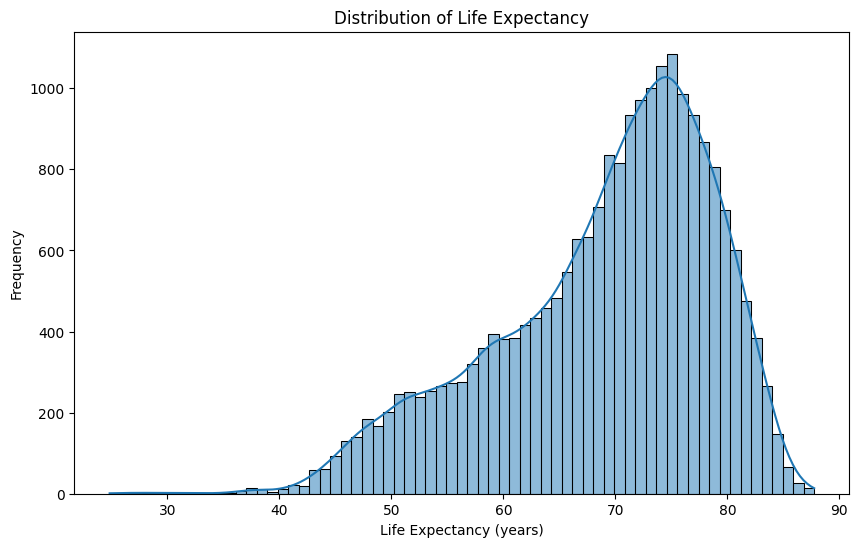

In [ ]:
#this code was generated by gemini when asked to show the distribution of life expectancy in the df
target = 'Life Expectancy'

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[target], kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Frequency")
plt.show()

The distribution of Life Expectancy is right-skewed with a strong central peak, indicating that most observations fall between roughly 65 and 80 years, with a clear concentration around the low-to-mid 70s. This suggests that many countries (or country-year records) report relatively high life expectancy, consistent with global improvements in health and development.
There is also a longer left tail, with some observations dropping into the 30–50 year range. These represent countries or time periods with substantially lower life expectancy, likely reflecting historical data, conflict, socioeconomic disadvantage, or limited healthcare access.

The distribution is continuous and unimodal, with no signs of distinct subpopulations. This is appropriate for regression modelling and indicates that predicting life expectancy is a reasonable supervised learning task.

### Visualizing Relationships: Top Correlated Features vs. Life Expectancy

We'll create scatter plots to visualize the relationship between 'Life Expectancy' and some of the features that showed the strongest positive and negative correlations in the correlation matrix. This helps in understanding the nature of these relationships more deeply.

Top positively correlated features with Life Expectancy: ['% Population Aged 15-64', '% Population Aged 65+']


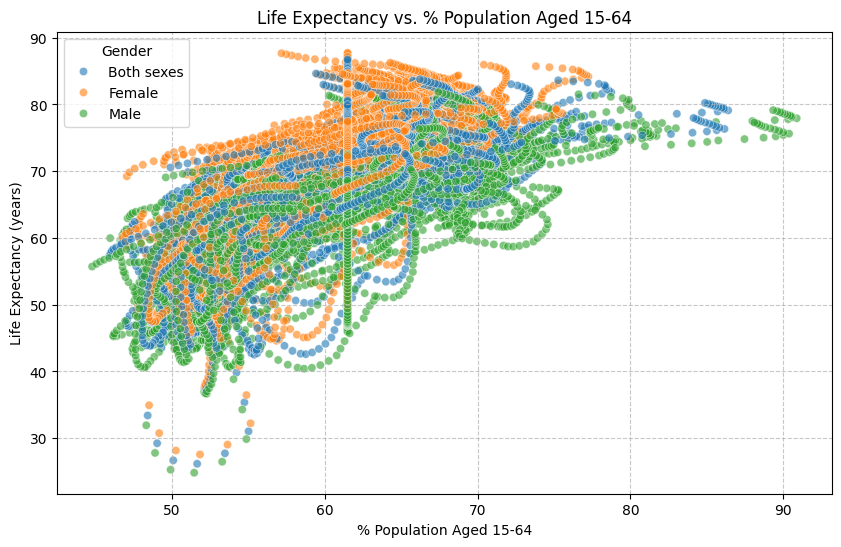

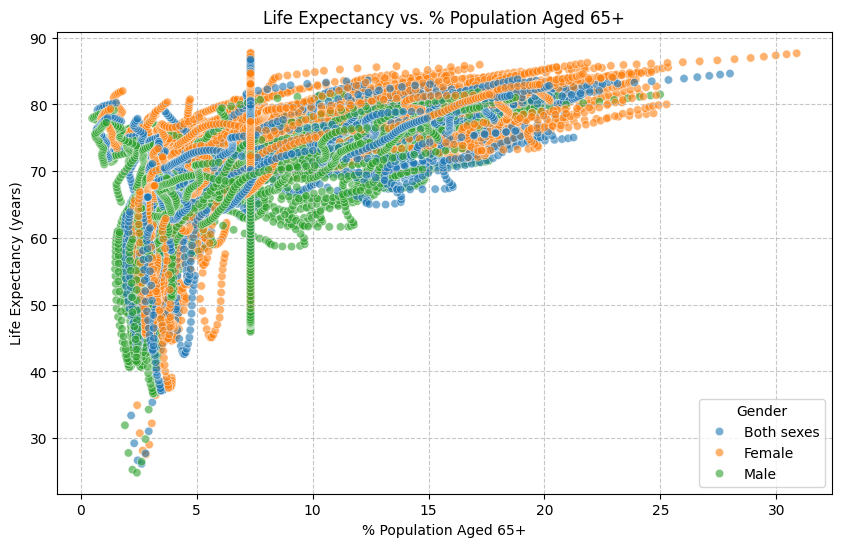

In [ ]:
# Get the top 2 features positively correlated with 'Life Expectancy' (excluding Life Expectancy itself)
# We'll use the 'life_expectancy_corr' Series calculated in the previous step.
# Assuming 'life_expectancy_corr' is available from the previous run

# If life_expectancy_corr is not defined from previous execution, run the correlation cell again
# For standalone execution, uncomment and run:
correlation_matrix = df_cleaned.corr(numeric_only=True)
life_expectancy_corr = correlation_matrix['Life Expectancy'].sort_values(ascending=False)

top_positive_features = life_expectancy_corr[1:3].index.tolist() # Get top 2 excluding itself

print(f"Top positively correlated features with Life Expectancy: {top_positive_features}")

# Create scatter plots for the top positively correlated features
for feature in top_positive_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=feature, y='Life Expectancy', hue='Gender', alpha=0.6)
    plt.title(f'Life Expectancy vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy (years)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

my next step would be to analyse this visual for data then prep the df for ML modelling via regression.